<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo_56/blob/main/Entrega_1_(16_11)_%3E_Limpieza%2C_an%C3%A1lisis%2C_visualizaci%C3%B3n_y_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 706 kB/s 
     |████████████████████████████████| 1.0 MB 40.0 MB/s 
     |████████████████████████████████| 1.7 MB 43.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 38.8 MB/s 
     |████████████████████████████████| 6.3 MB 43.4 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=f9a50dde6cbccbac4b8e447c8033c5d0e525856dd1d1edecb1cd67fc0682e26b
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=f75289f1db271c316c377f5b17c25ee04922b239425fc58facb113a208530e98
  Stored in directory: /root/.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_validate, learning_curve, validation_curve
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn import metrics
from math import isnan
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, QuantileTransformer
from sklearn.preprocessing import power_transform, quantile_transform
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
import seaborn as sns 
import warnings
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

In [ ]:
#url1 = '/content/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv'
url1 = '/content/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'
datos = pd.read_csv(url1,encoding = "ISO-8859-1")
datos.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


Se comprueba que no hay valores nulos en el dataset

In [4]:
datos.shape

(1068, 57)

In [ ]:
datos.isna().sum()

CLAVE                      0
SITIO                      0
ORGANISMO_DE_CUENCA        0
ESTADO                     0
MUNICIPIO                  0
ACUIFERO                   0
SUBTIPO                    0
LONGITUD                   0
LATITUD                    0
PERIODO                    0
ALC_mg/L                   4
CALIDAD_ALC                4
CONDUCT_mS/cm              6
CALIDAD_CONDUC             6
SDT_mg/L                1068
SDT_M_mg/L                 2
CALIDAD_SDT_ra             2
CALIDAD_SDT_salin          2
FLUORUROS_mg/L             0
CALIDAD_FLUO               0
DUR_mg/L                   1
CALIDAD_DUR                1
COLI_FEC_NMP/100_mL        0
CALIDAD_COLI_FEC           0
N_NO3_mg/L                 1
CALIDAD_N_NO3              1
AS_TOT_mg/L                0
CALIDAD_AS                 0
CD_TOT_mg/L                0
CALIDAD_CD                 0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG                 0
PB_TOT_mg/L   

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [ ]:
datos['CALIDAD_MN'].describe()

datos['CALIDAD_MN'].value_counts()

Potable - Excelente                                  982
Puede afectar la salud                                50
Sin efectos en la salud - Puede dar color al agua     36
Name: CALIDAD_MN, dtype: int64

In [5]:
datos.shape

(1068, 57)

In [6]:
datos.drop(columns=['SDT_mg/L'], inplace=True)

In [7]:
datos.isnull().values.any()

True

In [ ]:
#Obtenemos los nombres de las columnas 

#list(datos.columns)

In [25]:
# imputacion por moda - Categóricos
datos_cat = ['CALIDAD_ALC', 'CALIDAD_CONDUC','CALIDAD_SDT_ra','CALIDAD_SDT_salin','CALIDAD_FLUO','CALIDAD_DUR','CALIDAD_COLI_FEC','CALIDAD_N_NO3','CALIDAD_AS',
              'CALIDAD_CD','CALIDAD_CR', 'CALIDAD_HG','CALIDAD_PB', 'CALIDAD_MN', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES'   ]

# imputacion por moda - Continuos
datos_cnt = ['LONGITUD', 'LATITUD' ,'ALC_mg/L', 'SDT_M_mg/L' ,'CONDUCT_mS/cm' ,'FLUORUROS_mg/L', 'DUR_mg/L', 'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L']

# imputacion por moda - Binarios
datos_bin = ['CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra', 'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR', 'CUMPLE_CON_CF','CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD', 'CUMPLE_CON_CR',
             'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN' , 'CUMPLE_CON_FE' ]

In [26]:
cat_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])
cat_pipeline_names = datos_cat

cnt_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])
cnt_pipeline_names = datos_cnt

bin_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])
bin_pipeline_names = datos_bin

In [27]:
columnTransfomer = ColumnTransformer(transformers = [('catpimp', cat_pipeline, cat_pipeline_names),
                                                       ('cntimp', cnt_pipeline, cnt_pipeline_names),
                                                       ('binimp', bin_pipeline, bin_pipeline_names)
                                                       ],
                                       remainder='passthrough')

In [56]:
ndf = columnTransfomer.fit_transform(datos)
df = pd.DataFrame(ndf )
df = pd.DataFrame(ndf, columns=datos.columns)
df

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,Alta,Permisible para riego,Cultivos sensibles,Potable - Dulce,Potable - Optima,Potable - Dura,Potable - Excelente,Potable - Excelente,Apta como FAAP,Potable - Excelente,...,ASIENTOS,VALLE DE CHICALOTE,POZO,2020,<0.003,<0.005,<0.0005,<0.005,<0.0015,0.0891
1,Alta,Buena para riego,Excelente para riego,Potable - Dulce,Potable - Optima,Potable - Dura,Potable - Excelente,Potable - Buena calidad,Apta como FAAP,Potable - Excelente,...,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,2020,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
2,Alta,Buena para riego,Excelente para riego,Potable - Dulce,Alta,Potable - Dura,Potable - Excelente,Potable - Excelente,No apta como FAAP,Potable - Excelente,...,COSIO,VALLE DE AGUASCALIENTES,POZO,2020,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
3,Alta,Buena para riego,Excelente para riego,Potable - Dulce,Potable - Optima,Potable - Dura,Potable - Excelente,Potable - Excelente,Apta como FAAP,Potable - Excelente,...,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,2020,<0.003,0.005,<0.0005,<0.005,<0.0015,<0.025
4,Alta,Permisible para riego,Cultivos con manejo especial,Ligeramente salobres,Baja,Potable - Dura,Aceptable,No apta como FAAP,Potable - Excelente,Potable - Excelente,...,LA PAZ,TODOS SANTOS,POZO,2020,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Alta,Dudosa para riego,Cultivos con manejo especial,Ligeramente salobres,Baja,Muy dura e indeseable usos industrial y domestico,Potable - Excelente,No apta como FAAP,Potable - Excelente,Potable - Excelente,...,LINARES,CITRICOLA SUR,POZO,2020,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
1064,Alta,Buena para riego,Excelente para riego,Potable - Dulce,Baja,Potable - Dura,Potable - Excelente,No apta como FAAP,Potable - Excelente,Potable - Excelente,...,LINARES,CITRICOLA SUR,POZO,2020,<0.003,<0.005,<0.0005,<0.005,0.00709,0.07578
1065,Alta,Dudosa para riego,Cultivos con manejo especial,Ligeramente salobres,Potable - Optima,Muy dura e indeseable usos industrial y domestico,Aceptable,No apta como FAAP,Potable - Excelente,Potable - Excelente,...,CADEREYTA JIMENEZ,CITRICOLA NORTE,POZO,2020,<0.003,<0.005,<0.0005,<0.005,0.0242,0.2129
1066,Alta,Permisible para riego,Cultivos sensibles,Potable - Dulce,Potable - Optima,Potable - Dura,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,...,GALEANA,NAVIDAD-POTOSI-RAICES,POZO,2020,<0.003,<0.005,<0.0005,<0.005,0.012,0.1786


In [42]:
df.isnull().values.any()


,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,Alta,Permisible para riego,Cultivos sensibles,Potable - Dulce,Potable - Optima,Potable - Dura,Potable - Excelente,Potable - Excelente,Apta como FAAP,Potable - Excelente,...,ASIENTOS,VALLE DE CHICALOTE,POZO,2020,<0.003,<0.005,<0.0005,<0.005,<0.0015,0.0891
1,Alta,Buena para riego,Excelente para riego,Potable - Dulce,Potable - Optima,Potable - Dura,Potable - Excelente,Potable - Buena calidad,Apta como FAAP,Potable - Excelente,...,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,2020,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
2,Alta,Buena para riego,Excelente para riego,Potable - Dulce,Alta,Potable - Dura,Potable - Excelente,Potable - Excelente,No apta como FAAP,Potable - Excelente,...,COSIO,VALLE DE AGUASCALIENTES,POZO,2020,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
3,Alta,Buena para riego,Excelente para riego,Potable - Dulce,Potable - Optima,Potable - Dura,Potable - Excelente,Potable - Excelente,Apta como FAAP,Potable - Excelente,...,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,2020,<0.003,0.005,<0.0005,<0.005,<0.0015,<0.025
4,Alta,Permisible para riego,Cultivos con manejo especial,Ligeramente salobres,Baja,Potable - Dura,Aceptable,No apta como FAAP,Potable - Excelente,Potable - Excelente,...,LA PAZ,TODOS SANTOS,POZO,2020,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025


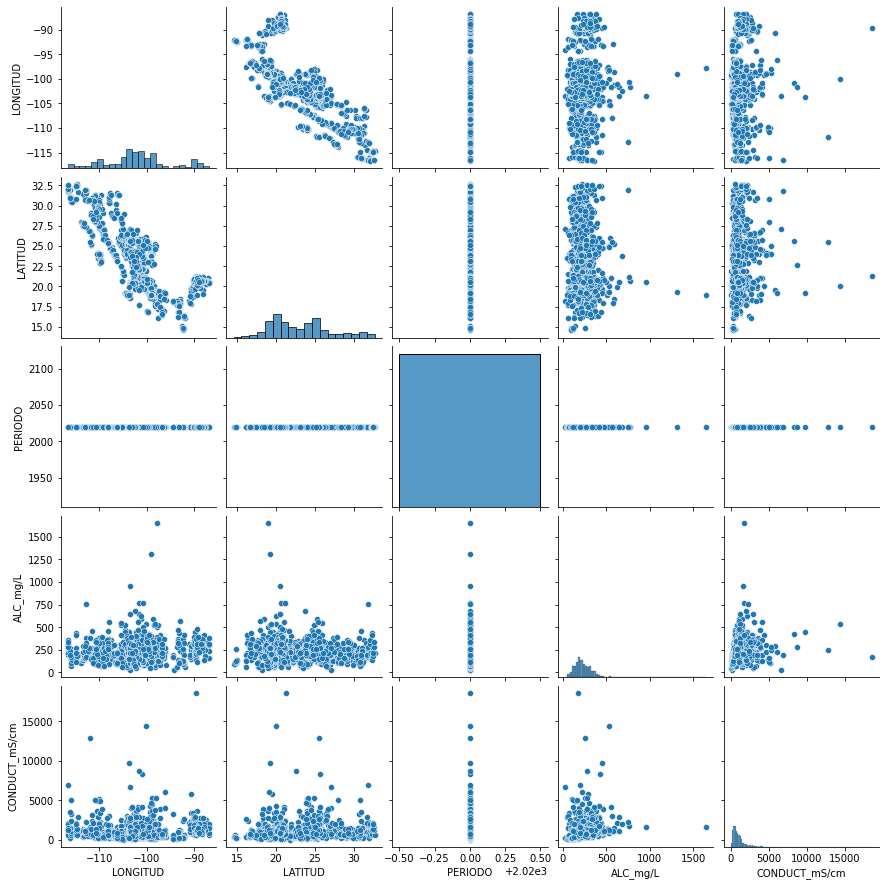

In [43]:
sns.pairplot(datos)

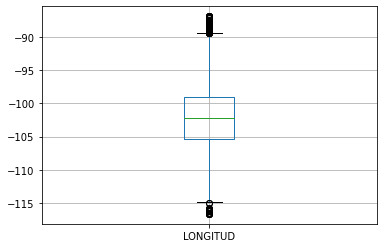

In [44]:
datos.boxplot(column=['LONGITUD'])  

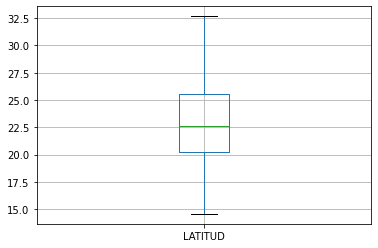

In [45]:
datos.boxplot(column=['LATITUD'])

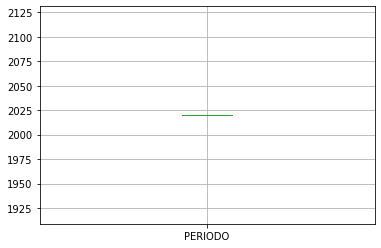

In [46]:
datos.boxplot(column=['PERIODO'])

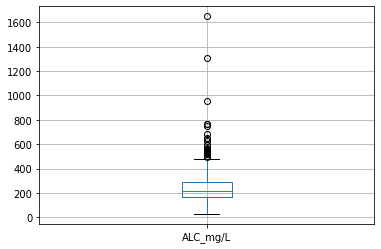

In [51]:
datos.boxplot(column=['ALC_mg/L'])

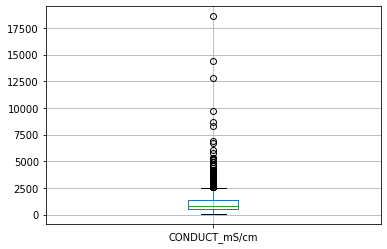

In [52]:
datos.boxplot(column=['CONDUCT_mS/cm'])

In [53]:
datos.corr()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm
LONGITUD,1.000000,-0.760204,NaN,0.167234,0.061118
LATITUD,-0.760204,1.000000,NaN,-0.080026,0.053786
PERIODO,NaN,NaN,NaN,NaN,NaN
ALC_mg/L,0.167234,-0.080026,NaN,1.000000,0.232003
CONDUCT_mS/cm,0.061118,0.053786,NaN,0.232003,1.000000


In [ ]:
CALIDAD_ALC1 = ['Alta' ,'Media']

CALIDAD_CONDUC1 = ['Permisible para riego' ,'Buena para riego' ,'Dudosa para riego',
                        ]
CALIDAD_SDT_ra1 = ['Cultivos sensibles' ,'Excelente para riego',
                    'Cultivos con manejo especial' ]
CALIDAD_SDT_salin1 = ['Potable - Dulce', 'Ligeramente salobres', ]

CALIDAD_FLUO1 = ['Potable - Optima' ,'Alta' ,'Baja' ,'Media']

CALIDAD_DUR1 = ['Potable - Dura' ,'Potable - Suave', 'Potable - Moderadamente suave' ]

CALIDAD_COLI_FEC1 = ['Potable - Excelente' ,'Aceptable' ,'Buena calidad']

CALIDAD_N_NO31 = ['Potable - Excelente' ,'Potable - Buena calidad' ,'No apta como FAAP' ]

CALIDAD_AS1 = ['Apta como FAAP', 'No apta como FAAP', 'Potable - Excelente']

CALIDAD_MN1 = ['Potable - Excelente' , 'Sin efectos en la salud - Puede dar color al agua']

CALIDAD_FE1 = ['Potable - Excelente' ,'Sin efectos en la salud - Puede dar color al agua']

In [ ]:
#Filtrafo de datos 
newdf_pot = datos.loc[(datos.CALIDAD_MN == 'Potable - Excelente')]
newdf_sin = datos.loc[(datos.CALIDAD_MN == 'Sin efectos en la salud - Puede dar color al agua')]
newdf_pu = datos.loc[(datos.CALIDAD_MN == 'Puede afectar la salud')]



In [ ]:
#Tamano de Potable/ excelente 
newdf_pot.shape

(982, 57)

In [ ]:
#Tamano Sin efectos en la salud - Puede dar color al agua' 
newdf_sin.shape

(36, 57)

In [ ]:
#Tamano 'Puede afectar la salud'' 
newdf_pu.shape

(50, 57)

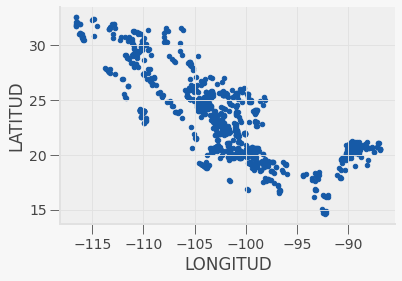

In [ ]:
latlong_pot=newdf_pot[["LONGITUD","LATITUD"]]
latlong_pot.plot.scatter( "LONGITUD","LATITUD")


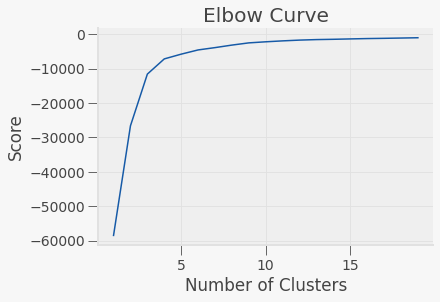

In [ ]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(latlong_pot).score(latlong_pot) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5).fit(latlong_pot)
centroids_pot = kmeans.cluster_centers_
print(centroids_pot)

[[-100.17233171   20.26030019]
 [-103.24675467   24.73698274]
 [ -89.96743794   19.71226617]
 [-112.12196228   30.20953712]
 [-109.27409095   25.34746037]]


Numer de agrupaciones para agua potable = 5

In [ ]:
latlong_pot["Coordinates"] = list(zip(latlong_pot.LONGITUD, latlong_pot.LATITUD))
latlong_pot["Coordinates"] = latlong_pot["Coordinates"].apply(Point)
gdf_pot = gpd.GeoDataFrame(latlong_pot, geometry="Coordinates")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


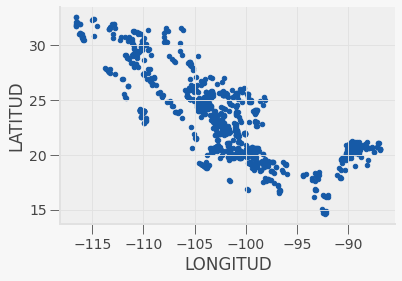

In [ ]:
latlong_sin=newdf_sin[["LONGITUD","LATITUD"]]
latlong_pot.plot.scatter( "LONGITUD","LATITUD")


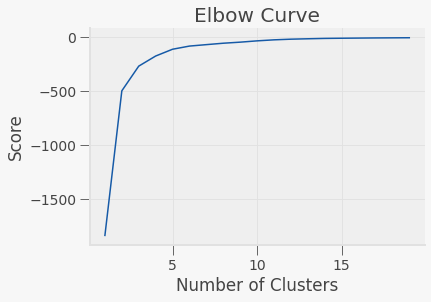

In [ ]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(latlong_sin).score(latlong_sin) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Agrupaciones de =  3 
para grupo Sin efectos en la salud - Puede dar color al agua

In [ ]:
kmeans = KMeans(n_clusters=3).fit(latlong_sin)
centroids_sin = kmeans.cluster_centers_
print(centroids_sin)

[[-104.68104      21.33039636]
 [-114.1748152    32.1619394 ]
 [ -99.0686151    19.9456238 ]]


In [ ]:
latlong_sin["Coordinates"] = list(zip(latlong_sin.LONGITUD, latlong_sin.LATITUD))
latlong_sin["Coordinates"] = latlong_sin["Coordinates"].apply(Point)
gdf_sin = gpd.GeoDataFrame(latlong_sin, geometry="Coordinates")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


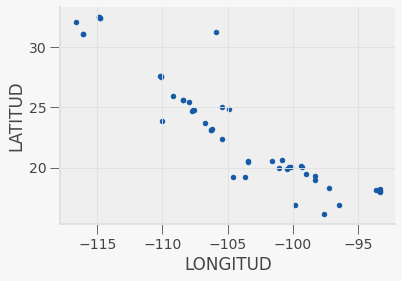

In [ ]:
latlong_pu=newdf_pu[["LONGITUD","LATITUD"]]
latlong_pu.plot.scatter( "LONGITUD","LATITUD")

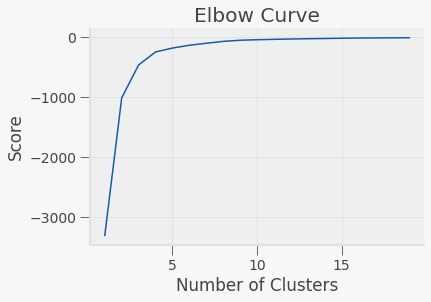

In [ ]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(latlong_pu).score(latlong_pu) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Agrupaciones = 5 
para el grupo 'Puede afectar la salud' 

In [ ]:
kmeans = KMeans(n_clusters=5).fit(latlong_pu)
centroids_pu = kmeans.cluster_centers_
print(centroids_pu)

[[-106.418884     23.971429  ]
 [ -94.7724535    17.73327775]
 [-108.93516689   26.70074911]
 [-100.83072025   19.70332119]
 [-115.46716271   32.000323  ]]


In [ ]:
latlong_pu["Coordinates"] = list(zip(latlong_pu.LONGITUD, latlong_pu.LATITUD))
latlong_pu["Coordinates"] = latlong_pu["Coordinates"].apply(Point)
gdf_pu = gpd.GeoDataFrame(latlong_pu, geometry="Coordinates")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


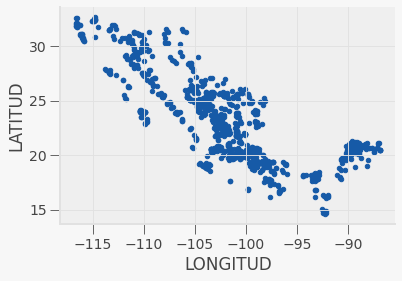

In [ ]:
latlong=datos[["LONGITUD","LATITUD"]]
latlong.plot.scatter( "LONGITUD","LATITUD")

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [ ]:
datos["Coordinates"] = list(zip(datos.LONGITUD, datos.LATITUD))
datos["Coordinates"] = datos["Coordinates"].apply(Point)
datos.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,Coordinates
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.0221 22.20887)
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.20075 21.99958)
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,POINT (-102.28801 22.36685)
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.29449 22.18435)
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,NO,SI,SI,SI,SI,SI,SI,SI,POINT (-110.2448 23.45138)


In [ ]:
gdf = gpd.GeoDataFrame(datos, geometry="Coordinates")
gdf.head()
gdf.shape

(1068, 58)

In [ ]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


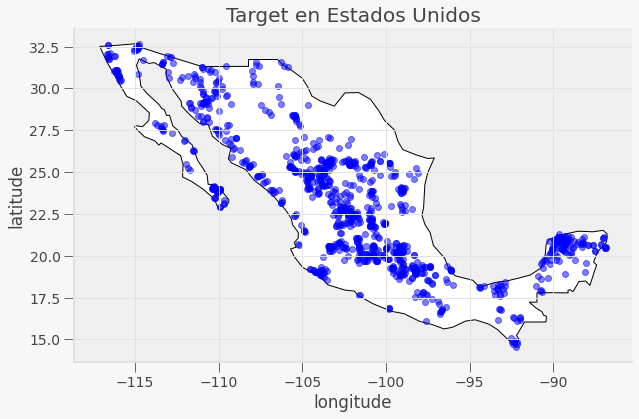

In [ ]:

fig, gax = plt.subplots(figsize=(10,10))


world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')


gdf.plot(ax=gax, color='blue', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

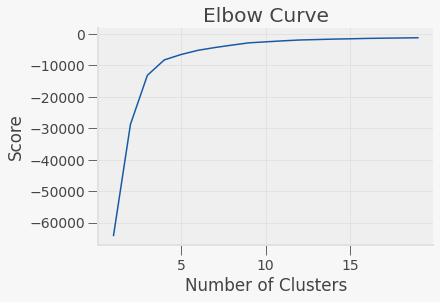

In [ ]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(latlong).score(latlong) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5).fit(latlong_pot)
centroids = kmeans.cluster_centers_
print(centroids)

[[-112.25418009   30.13391374]
 [-100.09153496   19.88225026]
 [-102.55889739   24.22592542]
 [ -89.96743794   19.71226617]
 [-107.76455864   25.8263907 ]]


In [ ]:

cent = pd.DataFrame(centroids, columns=["longitude","latitude"])
cent.head(1)
cent.shape
cent.head(5)

,longitude,latitude
0,-112.254180,30.133914
1,-100.091535,19.882250
2,-102.558897,24.225925
3,-89.967438,19.712266
4,-107.764559,25.826391


In [ ]:
cent1 = pd.DataFrame(centroids_pot, columns=["longitude","latitude"])
cent2 = pd.DataFrame(centroids_sin, columns=["longitude","latitude"])
cent3 = pd.DataFrame(centroids_pu, columns=["longitude","latitude"])

In [ ]:
cent1["Coordinates"] = list(zip(cent1.longitude, cent1.latitude))
cent1["Coordinates"] = cent1["Coordinates"].apply(Point)

cent2["Coordinates"] = list(zip(cent2.longitude, cent2.latitude))
cent2["Coordinates"] = cent2["Coordinates"].apply(Point)

cent3["Coordinates"] = list(zip(cent3.longitude, cent3.latitude))
cent3["Coordinates"] = cent3["Coordinates"].apply(Point)

In [ ]:
gdf1 = gpd.GeoDataFrame(cent1, geometry="Coordinates")
gdf2 = gpd.GeoDataFrame(cent2, geometry="Coordinates")
gdf3 = gpd.GeoDataFrame(cent3, geometry="Coordinates")

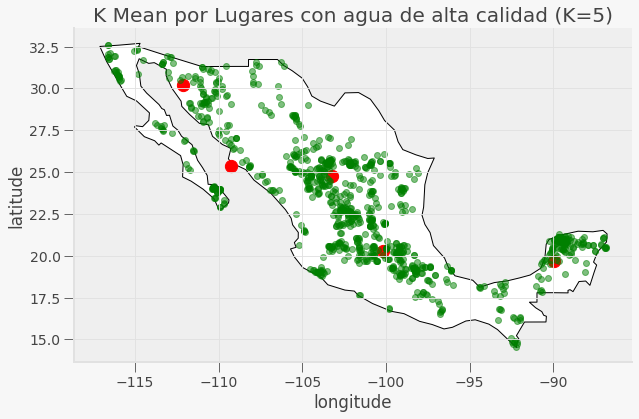

In [ ]:
from matplotlib.lines import MarkerStyle

fig, gax = plt.subplots(figsize=(10,10))


world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')


gdf1.plot(ax=gax, color='red', alpha = 1,markersize=150)

gdf_pot.plot(ax=gax, color='green', alpha = 0.5)


gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('K Mean por Lugares con agua de alta calidad (K=5)')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

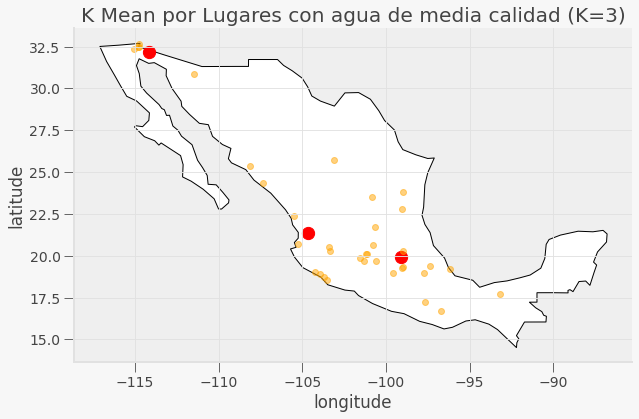

In [ ]:
from matplotlib.lines import MarkerStyle

fig, gax = plt.subplots(figsize=(10,10))


world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')


gdf2.plot(ax=gax, color='red', alpha = 1,markersize=150)

gdf_sin.plot(ax=gax, color='orange', alpha = 0.5)


gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('K Mean por Lugares con agua de media calidad (K=3)')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

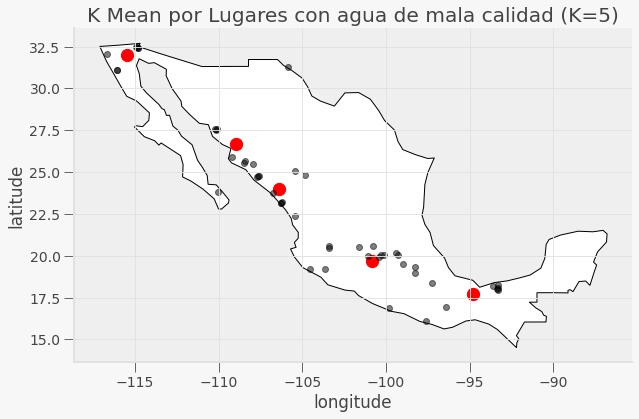

In [ ]:
from matplotlib.lines import MarkerStyle

fig, gax = plt.subplots(figsize=(10,10))


world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')


gdf3.plot(ax=gax, color='red', alpha = 1,markersize=150)

gdf_pu.plot(ax=gax, color='black', alpha = 0.5)


gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('K Mean por Lugares con agua de mala calidad (K=5)')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

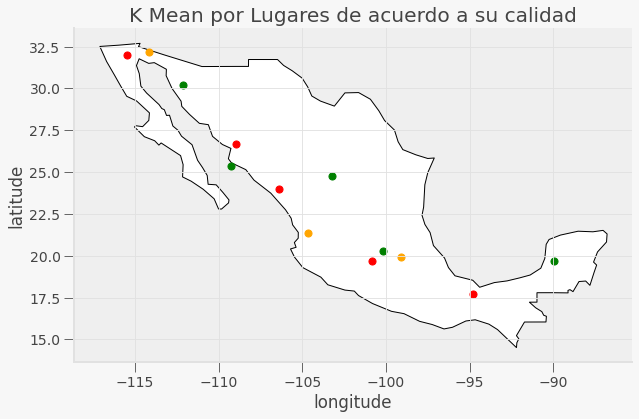

In [ ]:
from matplotlib.lines import MarkerStyle

fig, gax = plt.subplots(figsize=(10,10))


world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')


gdf1.plot(ax=gax, color='green', alpha = 1,markersize=50)
gdf2.plot(ax=gax, color='orange', alpha = 1,markersize=50)
gdf3.plot(ax=gax, color='red', alpha = 1,markersize=50)


gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('K Mean por Lugares de acuerdo a su calidad')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()